**This project aims to use machine learning techniques to predict house prices. Accurate prediction of home prices plays an important role in making buying and selling decisions and determining investment strategies in the real estate industry. This project aims to use data science and machine learning techniques to understand and accurately predict the factors affecting house prices.**



In [1]:
import pandas as pd
df= pd.read_csv("Housing.csv")

In [3]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df["price"].sum()

2597867440

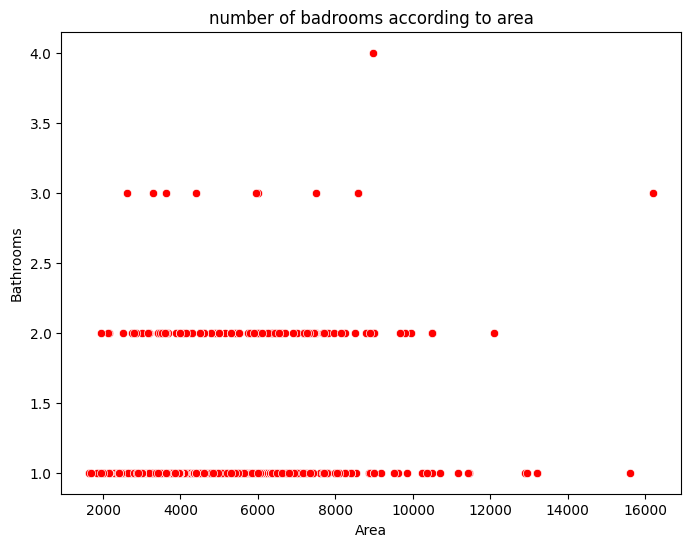

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='bathrooms', data=df, color='red')
plt.title('number of badrooms according to area')
plt.xlabel('Area')
plt.ylabel('Bathrooms')
plt.show()

<ipython-input-18-b72be683922d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


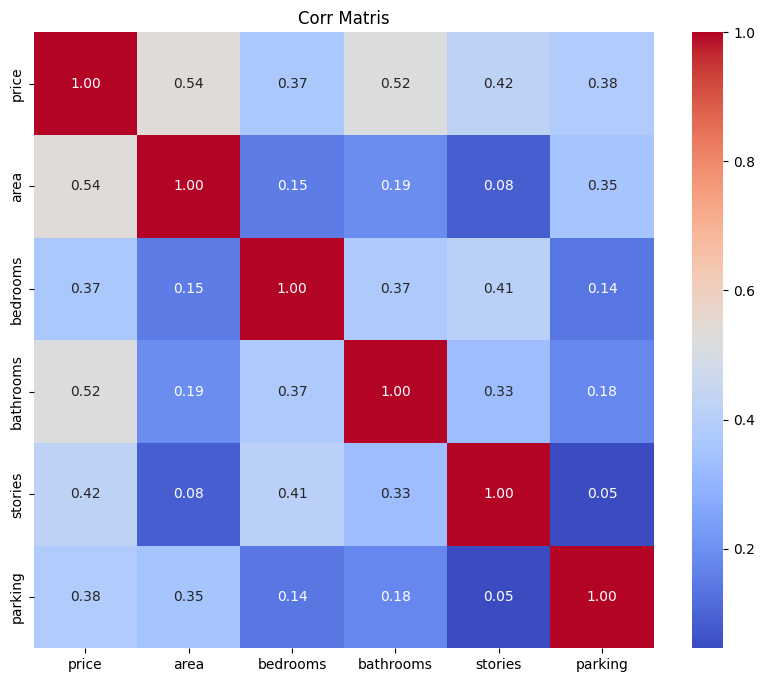

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corr Matris')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training set target variable size:", y_train.shape)
print("Test set target variable size:", y_test.shape)


Training set size: (381, 12)
Test set size: (164, 12)
Training set target variable size: (381,)
Test set target variable size: (164,)


In [22]:
X_train['mainroad'] = X_train['mainroad'].replace({'yes': 1, 'no': 0})


X_train['guestroom'] = X_train['guestroom'].replace({'yes': 1, 'no': 0})
X_train['basement'] = X_train['basement'].replace({'yes': 1, 'no': 0})

X_train['hotwaterheating'] = X_train['hotwaterheating'].replace({'yes': 1, 'no': 0})
X_train['airconditioning'] = X_train['airconditioning'].replace({'yes': 1, 'no': 0})

X_train['prefarea'] = X_train['prefarea'].replace({'yes': 1, 'no': 0})
X_train = pd.get_dummies(X_train, columns=['furnishingstatus'], drop_first=True)


In this project, different regression models were used to predict house prices. The reasons for choosing the models and the training process are explained below:

Linear Regression:

Linear regression is a simple and highly interpretable model. In particular, it is used to model the linear relationship between variables.
The model learns by adapting to the training set. This attempts to capture the linear relationship between features and prices in the data set.
Performance is evaluated using the mean square error (MSE) metric.
Decision Trees:

Decision trees are used to capture complex relationships in a data set. Additionally, decision trees can also model nonlinear relationships.
The model is trained by creating a decision tree on the training set. This tree predicts prices based on the values of features in the dataset.
Performance is evaluated using the MSE metric.
Random Forests:

Random forests are an ensemble method formed by combining more than one decision tree. This results in a model that is more balanced against the tendencies of a single tree.
The model is trained by creating many decision trees on the training set.
Performance is evaluated using the MSE metric.
Support Vector Machines (SVM):

Support vector machines are used specifically to capture nonlinear relationships. Additionally, it can be effective on multidimensional data sets.
The model learns on the training set and separates classes by creating an optimal separation hyperplane.
Performance is evaluated using the MSE metric.
Each model is trained on the training set and then its performance on the test set is evaluated. The MSE metric is used to evaluate the performance of each model. The best performing model is selected as the model with lower MSE value on the test set.

In [23]:
#Find the best ML model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
svm_model = SVR()

linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

def evaluate_model(model, X_train, y_train):
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    return mse

print("Linear Regression MSE:", evaluate_model(linear_reg_model, X_train, y_train))
print("Decision Tree MSE:", evaluate_model(decision_tree_model, X_train, y_train))
print("Random Forest MSE:", evaluate_model(random_forest_model, X_train, y_train))
print("Support Vector Machine MSE:", evaluate_model(svm_model, X_train, y_train))


Linear Regression MSE: 963835379828.3596
Decision Tree MSE: 2705417322.8346457
Random Forest MSE: 148243780190.91046
Support Vector Machine MSE: 3286205673720.1997


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#I chose Decision Tree Model
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Max depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Karar ağacı modelini oluşturma
tree_model = DecisionTreeRegressor()

# Hiperparametre arama  yapma
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hyperparametrs
best_params = grid_search.best_params_
print("The best hyperparametrs:", best_params)

best_tree_model = grid_search.best_estimator_

best_model_mse = evaluate_model(best_tree_model, X_train, y_train)
print("MSE value of the best model on the training set:", best_model_mse)


The best hyperparametrs: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
MSE value of the best model on the training set: 893953518264.6035


In [27]:
from sklearn.model_selection import cross_val_score

# Cross Val. for Decision Tree
tree_model = DecisionTreeRegressor(max_depth=5)
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

cv_mse = -cv_scores.mean()
print("Cross-validation MSE value:", cv_mse)


Cross-validation MSE value: 1783007662071.2976


It represents a study in which we used machine learning methods to predict house prices. Accurately estimating home prices is of great importance to both home buyers and sellers. These forecasts play a critical role in making buying and selling decisions in the real estate market and determining investment strategies.

Our results show how valuable the predictions obtained using different regression models are. In particular, we found that the best-performing model was better at predicting house prices than other models. These results can provide important guidance for decision makers in the real estate industry.

I would like to thank everyone who contributed to the successful completion of this project. I would also like to express my gratitude to those who provided access to the dataset and resources. We hope that the results of this project will contribute to making smarter, data-driven decisions for predicting house prices.

Thanks.